======================================================================



Name  : Iznia Azyati 




Dataset yang digunakan adalah dataset perjalanan Uber dan Lyft. Dataset ini berisi informasi tentang harga perjalanan dan berbagai fitur lain yang dapat digunakan untuk memprediksi harga.

Dataset tersebut berisi informasi mengenai perjalanan menggunakan platform ride-hailing. Tujuan dari proyek ini adalah untuk membangun model Linear Regression yang dapat memprediksi harga perjalanan berdasarkan fitur-fitur yang tersedia dalam dataset rideshare_kaggle.

======================================================================


## Conceptual Problems

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression ! (Gunakan bahasa anda sendiri)

    **Jawab:**
    1. Linear Relationship
    
        Hubungan antara variabel independen (x) dan variabel dependen (target/y) harus linear. Yaitu, perubahan pada variabel independen seharusnya menghasilkan perubahan yang proporsional pada variabel target.

    2. No Multicollinearity
    
        Variabel independen (x) tidak boleh berkorelasi satu sama lain. Jika ada korelasi yang besar antar variabel x, maka sulit untuk menentukan pengaruh masing-masing variabel x terhadap variabel target (y).

        Untuk mengeceknya bisa dengan Variance Inflation Factor (VIF). Skkalanya jika nilai VIF > 10, maka akan terdapat multikolinearitas. 
    
    3. Multivariate Normality
        
        Sisa (residual) dari prediksi harus berdistribusi normal. Untuk mengeceknya bisa menggunakan plot Q-Q. 
    

    4. No Auto-Correlation
        
        Residual (kesalahan prediksi) tidak boleh berkorelasi satu sama lain, gunanya untuk mastiin tidak ada korelasi di antara residual yang bisa menunjukkan informasi yang belum dimodelkan. Untuk memeriksa auto korelasi bisa dengan menggunakan Durbin Watson. Skalanya jika d = 2 maka tidak terdapat auto korelasi.
    
    5. Homoscedasticity

        Variansi residual harus konstan di semua nilai prediksi. Bisa dilakukan dengan plot residual vs prediksi atau uji Breusch-Pagan. 



2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun!

    **Jawab:**

    - Slope (Koefisien): Menunjukkan perubahan harga perjalanan untuk setiap unit perubahan pada fitur terkait. Misalnya, jika koefisien untuk 'distance' adalah 2, maka untuk setiap penambahan satu unit jarak, harga perjalanan diprediksi naik sebesar 2.
    - Intercept: Nilai harga perjalanan saat semua fitur bernilai nol. Ini merupakan titik di mana garis regresi memotong sumbu Y.



### 2. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr, kendalltau



In [3]:
!pip install feature_engine

### 3. Data Loading 

In [4]:
# Load Dataset
data = pd.read_csv('D:/.Hacktiv8/Bahan Materi/Phase 1/Week 1/archive/rideshare_kaggle.csv')

# Display data beberapa baris pertama
data.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
# Duplicate Dataset
data_duplicate = data.copy()

In [6]:
# Cek size dari Dataset
data.shape

(693071, 57)

Jadi terdapat 693.071 baris dengan 57 kolom.

In [7]:
# Informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

- Pada dataset 'rideshare_kaggle.csv' ini ada 57 kolom dengan total baris sebanyak 693.071 dan masing-masing data terdiri dari 29 kolom bertipe float, 17 kolom bertipe integer, dan 11 kolom bertipe object.
- Terdapat adanya missing value pada kolom price sebanyak 55.095. 

In [8]:
# Cek missing values
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

#### Handling missing value

Karena terdapat missing value pada kolom `price` maka diperlukan handling missing value kolom `price` (variabel y) dengan menghapus / drop missing value tsb. Sehingga data yang dianalisis akan berkurang sebanyak missing valuenya (sebesar 55.095)

In [9]:
# Hapus/drop missing value
data.dropna(subset=['price'], inplace=True)
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [10]:
# Cek missing values setelah di handling
data.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [11]:
# Informasi Data setelah handling missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13  dist

In [12]:
# cek size data setelah handling missing value
data.shape

(637976, 57)

- Ada missing value sebanyak 55.095 pada kolom `price`, sudah dilakukan handling dengan cara drop atau menghapus nilai missing valuenya. 
- Setelah dilakukan handling missing value pada variabel target `price`, jumlah kolom baris yang akan dianalisis sebanyak 637.976 dengan 57 kolom. 
- Sudah tidak adalagi missing value.

In [13]:
# Cek dataset 2

# Basic Statistik Dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,637976.0,1.544046e+09,689202.790112,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,637976.0,1.161853e+01,6.948776,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,637976.0,1.779767e+01,9.982083,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,637976.0,1.158655e+01,0.492452,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,637976.0,2.189261e+00,1.135413,2.000000e-02,1.270000e+00,2.160000e+00,2.930000e+00,7.860000e+00
surge_multiplier,637976.0,1.015068e+00,0.095422,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,637976.0,4.233816e+01,0.047856,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,637976.0,-7.106614e+01,0.020303,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,637976.0,3.958241e+01,6.725500,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


- Dilihat dari data statistik yang dilakukan, dataset ini memiliki rata-rata jam sehari (00:00 - 23:59) yaitu di 11.62.
- Rata-rata hari dalam sebulan itu 17.79 dengan standar deviasi 9.98.
- Rata-rata harga perjalanan (price) dalam dolar yaitu $16.55.
- Temperature dan apparentTemperature dalam derajat Fahrenheit dengan suhu rata-rata 39.58°F, rentang 18.91°F hingga 57.22°F dan apparentTemperature dengan rata-rata 35.88°F, rentang 12.13°F hingga 57.22°F. 

### 4. Exploratory Data Analysis (EDA)

Melakukan eksplorasi data untuk memahami struktur dan karakteristik dataset.

In [14]:
#column to list  
data.columns.tolist()

['id',
 'timestamp',
 'hour',
 'day',
 'month',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'short_summary',
 'long_summary',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'icon',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

In [15]:
#checking duplicate values  
data.nunique()

id                             637976
timestamp                       35796
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         12
name                               12
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

In [1]:
# Create Histogram and Scatter plot


# Visualize the distribution of the price
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(data['price'], kde = True, bins = 30)
plt.title('Histogram Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of price vs distance
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.scatterplot(x='distance', y='price', data=data)
plt.title('Price vs Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

NameError: name 'plt' is not defined

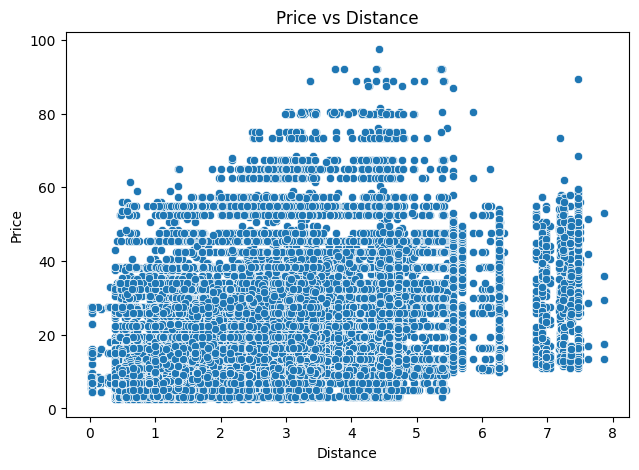

In [17]:
# Scatter plot of price vs distance
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.scatterplot(x='distance', y='price', data=data)
plt.title('Price vs Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()


- Distribusi harga (price) dalam data melalui histogram akan membantu untuk melihat rentang harga yang paling sering muncul dan bagaimana data terdistribusi.
    - Distribusi harga memiliki kemencengan ke kanan (positively skewed), berarti sebagian besar harga perjalanan terkonsentrasi pada kisaran harga yang lebih rendah.
    - Mayoritas harga perjalanan berada di bawah $20.
- Hubungan antara harga (price) dan jarak (distance) melalui scatter plot. Ini menunjukkan apakah terdapat hubungan positif, negatif, atau tidak ada hubungan antara kedua variabel tersebut.
    - Dari scatterplot diatas terlihat adanya tren bahwa semakin besar jarak perjalanan, harga cenderung meningkat.
    - Sebaran data cukup luas di sepanjang sumbu jarak dari 0 hingga sekitar 8 mil. 

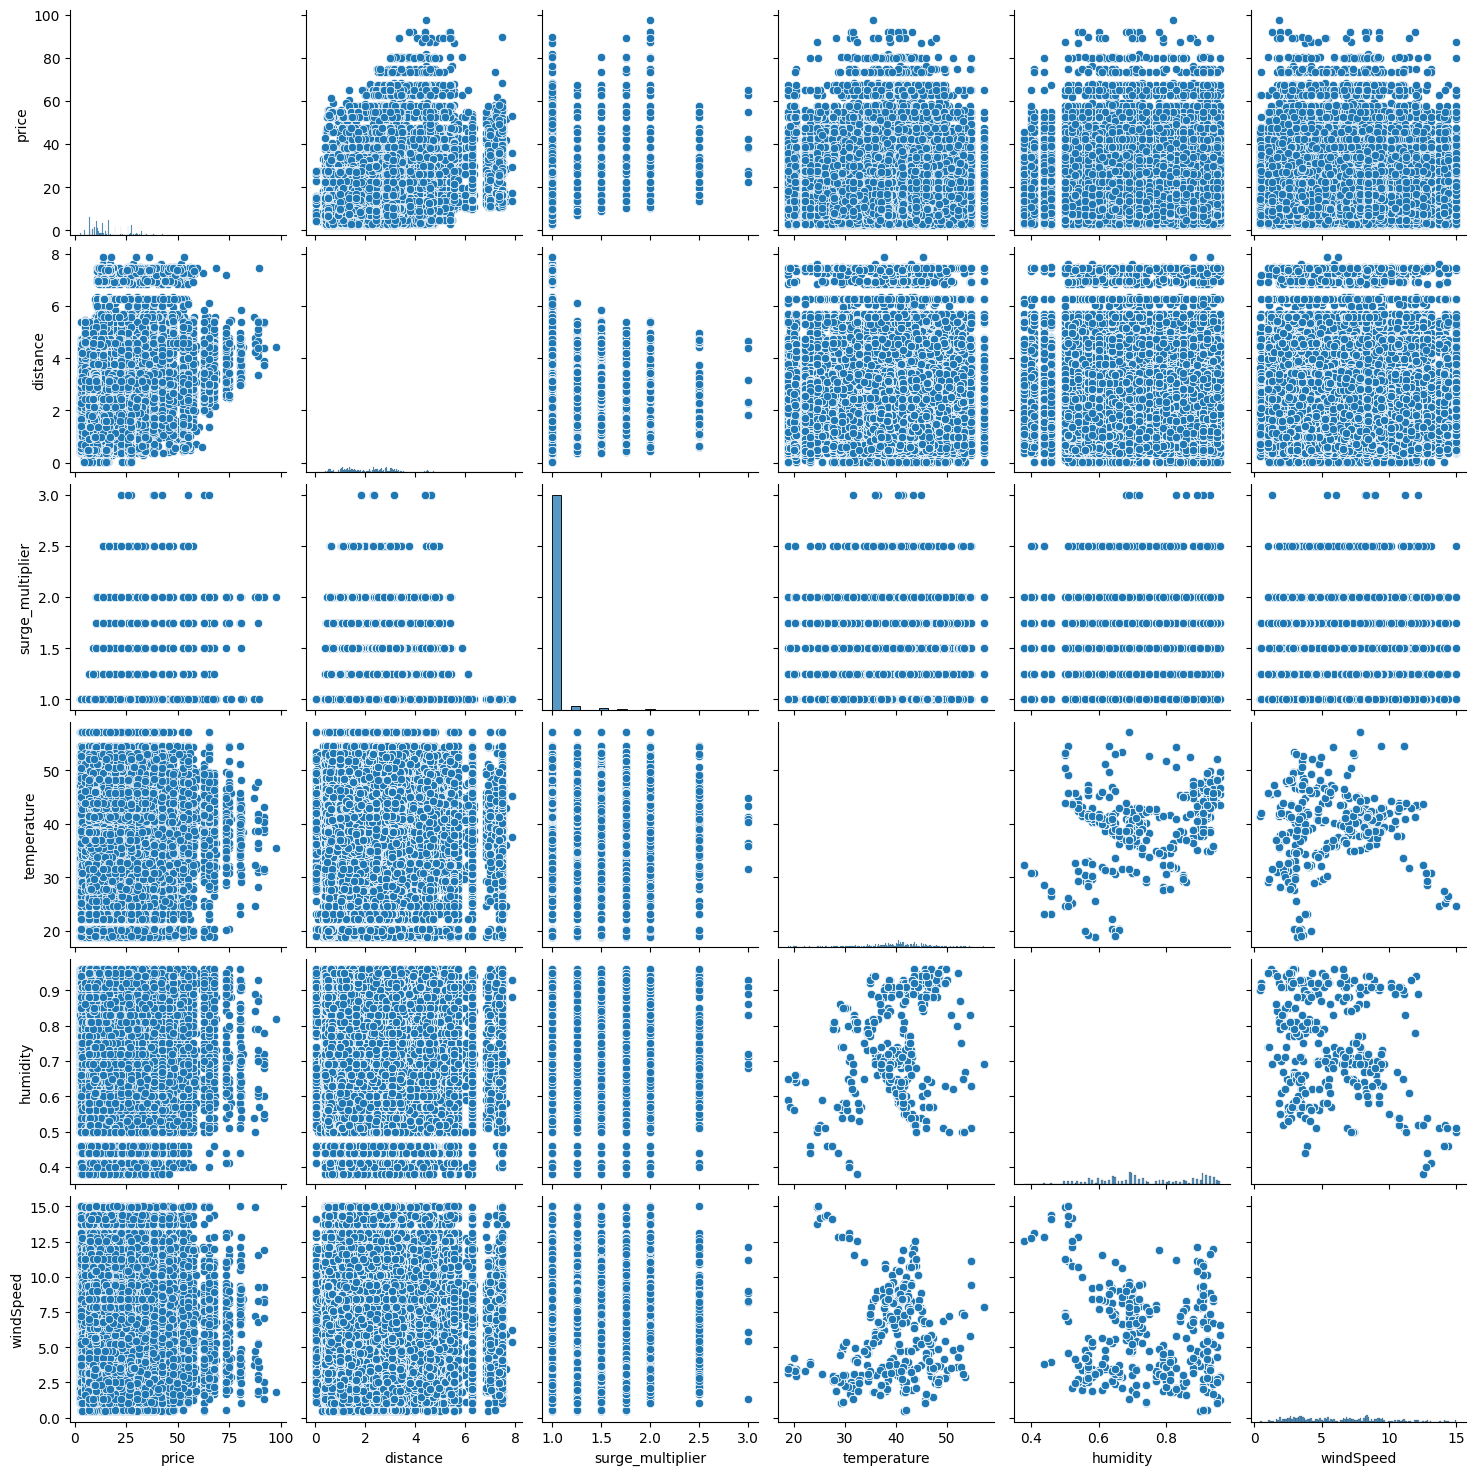

In [18]:
# Visualisasi hubungan antara fitur dan variabel target
sns.pairplot(data[['price', 'distance', 'surge_multiplier', 'temperature', 'humidity', 'windSpeed']])
plt.show()

Stetement: 

**Pairplot** ini digunakan untuk menampilkan hubungan antara beberapa variabel dalam sebuah dataset. 
Juga digunakan untuk identifikasi korelasi positif atau negatif antara variabel-variabel tersebut, identifikasi variabel-variabel yang paling berhubungan dengan variabel target (price), serta menemukan pola atau trend yang tidak terlihat dalam data


### 5. Feature Engineering

#### Handling Cardinality

In [19]:
# Mengatur tampilan untuk menunjukkan semua nilai unique dari kolom kategorikal
pd.set_option('display.max_colwidth', None)

# Identifikasi kolom kategorikal
cat_cols = list(data.select_dtypes(include='object').columns)

# Tampilkan jumlah nilai unique dan nilai unique dari setiap kolom kategorikal
listItem = []
for col in cat_cols:
  listItem.append([col, data[col].nunique(), data[col].unique()])


pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,id,637976,"[424553bb-7174-41ea-aeb4-fe06d4f4b9d7, 4bd23055-6827-41c6-b23b-3c491f24e74d, 981a3613-77af-4620-a42a-0c0866077d1e, c2d88af2-d278-4bfd-a8d0-29ca77cc5512, e0126e1f-8ca9-4f2e-82b3-50505a09db9a, f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2, 462816a3-820d-408b-8549-0b39e82f65ac, 474d6376-bc59-4ec9-bf57-4e6d6faeb165, 4f9fee41-fde3-4767-bbf1-a00e108701fb, 8612d909-98b8-4454-a093-30bd48de0cb3, 9043bf77-1d45-4a93-9520-a083e0277f16, d859ec69-b3ff-4af8-9abd-441e31430c94, 009e9c53-074d-43cf-aef2-0fbc7a47ed3d, 23f145da-f0c1-4d1f-a184-496bc003a7db, 357559cb-8c58-4278-a41a-e33b2e0997a3, 50ef1165-9d23-416c-a65c-18906207b295, 91c4861c-1780-42b0-bca1-bbd64a422cc3, e219e545-a006-4936-a6cc-7d00adf0e418, 18d580ac-c91a-4b6d-aa75-ab62566f713e, 3ef5c509-f292-42ef-b39c-bce7059006a0, 5ef44fdf-c5d3-4d07-967a-a8710e537e74, a7c1afce-9781-41c9-b6a6-df109ad43ccd, d0782aae-4cfa-45df-b6e4-e300b09c2563, f4f03d2d-434b-41f3-935a-c29e3f2de8bd, 1d451059-895c-4179-8cec-40adfbc4f6d3, 1f64fcff-b01f-4b64-90f4-5c866d717317, 2ca4699c-21e1-4fb4-9cc2-1d6221199d08, 4149295f-4534-4712-b2cf-160308528c75, 80d2a972-2686-4edc-bc22-ddccdf211fde, 8674e79f-4c5b-4a2e-8327-a68997d5d740, 00dd58fc-fa9e-4eeb-bb6e-dfeb94611e85, 174b960d-58f1-4dfd-8672-8b43f13726a7, 1d34b421-4ee7-4ec5-bba5-265f43b91a4e, 72fb8672-a823-447e-ae15-fd51aef9db66, e61386a3-b205-49b4-b064-990b124ecfa2, 39f120bf-ddc0-4d27-8ab4-bb7d46ecf8e3, 4d36b792-8973-4dd2-aaf9-aacaac046bd5, 53bc8bc7-0b27-4648-9742-d7956d2a13a8, c05d4e09-3f00-43cf-a0d8-6f38c0f4d04a, c7d4bb19-3c35-46c7-ad3c-f00a03ccfdfe, d25c46f2-b8a3-454d-97d1-4e2c8e1dff68, 0c26c153-a58d-419d-b557-37cfad67585c, 104ced5c-1c1b-4021-94bb-b21af453399a, 1cf8a0a5-d871-41ba-91c7-53658851501e, 5e990c7a-8f5c-4583-812c-b6200dd018f6, bd1d5b1a-ed7f-4fc8-8fd1-9236a5de403e, c7a2284b-2f7b-49a8-8d5b-90e1ebe18a1f, 2e0059db-945e-4615-9f87-46b8966d62f2, 77667337-1484-497d-a0d2-2844126c2517, c03b25ba-1d74-4522-8f3b-feb4bebcb4c7, fa00bcf3-78f7-4b62-b133-c3190a85edab, 33d90ba7-60f5-4da1-afc3-39d4d038f7ec, 6c936f6d-c587-49ae-bb39-5aeb54eff756, 8b905a5a-c626-42a6-b23b-eae7c7b689a3, c8c093f0-960b-4668-b1f6-1e42dcf6bd6b, ee029d73-c9ad-463d-a15e-ba20fac8c292, f76a05b7-60a7-4df5-94b9-de16881691ca, 5e1deff9-8f75-4e77-a1b1-7f6749e4eed3, a6d2d9af-e412-4ec0-8206-88e272b5a14e, c53e48e4-a7b6-43e9-b4f4-afadc78dc2aa, c9dee6ef-eca0-43ba-9bf9-ec00a6638164, e209499c-d217-4ea8-b72a-8a879646b29a, fc3205bd-3419-40db-b00f-ddced9beff33, 26cd4b22-179f-48db-a03f-2cc8c87d624e, 5ed9f6ab-4582-45c6-a1de-5602e911c3bb, 09740fbe-a03b-48df-a25a-6a01d4fc30e7, 2ff1a200-7c68-4813-9141-af7eeb93b37d, 395294c8-4b2b-4cde-aaf9-3ac478cfddc3, 59481bfd-d72d-4d6d-af73-8006fc872948, aa1f01a1-f54a-4978-b266-a14f877baad1, b4d6e3a6-8fce-4863-9674-e3abb49c53db, 0617e9b6-45f9-4f45-aa2b-5d06da008088, 37b99b0e-d2a9-4aa6-b145-54de1c8793eb, 433900c1-12d0-4771-85ea-1e1f1a4a6d63, 76ec209b-45a1-47e7-9eda-bc3a22402b8e, a841f68a-a00f-456a-a3f2-2a4f2f2917d6, aaf17c52-066b-4449-abac-274132b8ffbf, 2effa2c2-6728-4274-b904-199a9fc830c4, 5ef55ad4-49da-4698-8d41-21f89d107085, 67f791f9-5bf4-4490-9358-95ffda17e5ea, 806fc0cf-814d-48aa-abe7-47d0eedf47d4, bcb04ae7-e199-495f-a22e-4f24dcf9088c, ef16279b-5893-4ea1-bf62-0548a6a541e7, 60f7fd10-aa55-42a8-9b19-2f8bb457459b, 7827cd75-7987-4f1b-a012-ab92c820c6c4, ea5d697f-425a-421c-a680-20bc8b36384e, fbe5b6f4-7771-4fed-93d9-350febdc20c2, fbe75666-8d95-404f-a2d2-56c1f94eb99a, ff49381b-9947-4a40-b100-ca58020e0dbe, 118a8165-c787-4761-89e5-a17aa5710c75, 14fd1233-8cea-4061-a66a-9a5ecec07f66, 2a98223c-db41-4d28-9f8a-f26775b12fd4, 3a2929f1-2310-4c96-8eeb-ca2ed3ad9915, c1463da2-43e9-4e83-a52f-eb4fbe9d85e6, e5face72-4e1e-499e-89db-6a136e11f7f5, 08a28a48-eec5-43f8-b81d-bc2f57fc7f9a, 1f384d44-39fa-4537-b6a9-e97c0420fc48, 408076ed-a826-4fb3-a602-f9940df0ae50, 6fad93ae-e127-4e63-92e8-aca70075a4ae, c8e81408-c663-41b0-97d8-01de32dddefd, ...]"
1,datetime,31350,"[2018-12-16 09:30:07, 2018-11-27 02:00:23, 2018-11-28 01:00:22, 2018-11-30 04:53:02, 2018-11-29 03:49:20, 2018-12-17 

**Cardinality Check Insight :**
- Kolom `id` dan `datetime` memiliki high cardinality dan dapat diabaikan karena tidak relevan untuk prediksi harga.
- `timezone` memiliki hanya 1 nilai unik (America/New_York), yang tidak memberikan informasi tambahan dan bisa diabaikan.
- Kolom `source` dan `destination` memiliki masing-masing 12 nilai unik, kemudian kolom `cab_type` memiliki 2 nilai unik (`Lyft`, `Uber`), yang juga memiliki cardinality rendah dan bisa digunakan setelah one-hot encoding.
- Kolom `cab_type`, `source`, dan `destination` memiliki low cardinality dan data ini siap untuk digunakan setelah encoding.


  
**Actions/Suggestion :**
1. Kolom yang diabaikan:
    - id dan datetime: High cardinality dan tidak relevan.
    - timezone: Low cardinality dengan satu nilai unik.
2. KOlom yang digunakan :
    - Normalisasi kolom numerikal :  distance, surge_multiplier, temperature, windSpeed.
    - One-hot Encoding untuk kolom kategorikal terpilih : source, destination, cab_type, product_id, short_summary, long_summary, icon. 

##### Split between X (Features) and y (target)

In [20]:
# Splitting between 'X' and 'y'

# Pilih fitur yang relevan dan target
features = ['distance', 'surge_multiplier', 'temperature', 'windSpeed', 'source', 'destination', 'cab_type', 'product_id', 'short_summary', 'long_summary', 'icon']
target = 'price'

# Drop rows with missing values
data = data.dropna(subset=features + [target])

# Membagi data menjadi fitur (X) dan target (y)
X = data[features]
y = data[target]
X

,distance,surge_multiplier,temperature,windSpeed,source,destination,cab_type,product_id,short_summary,long_summary,icon
0,0.44,1.0,42.34,8.66,Haymarket Square,North Station,Lyft,lyft_line,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,0.44,1.0,43.58,11.98,Haymarket Square,North Station,Lyft,lyft_premier,Rain,"Rain until morning, starting again in the evening.",rain
2,0.44,1.0,38.33,7.33,Haymarket Square,North Station,Lyft,lyft,Clear,Light rain in the morning.,clear-night
3,0.44,1.0,34.38,5.28,Haymarket Square,North Station,Lyft,lyft_luxsuv,Clear,Partly cloudy throughout the day.,clear-night
4,0.44,1.0,37.44,9.14,Haymarket Square,North Station,Lyft,lyft_plus,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.0,37.05,2.34,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693066,1.00,1.0,37.05,2.34,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693067,1.00,1.0,37.05,2.34,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693069,1.00,1.0,37.05,2.34,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night


In [21]:
# Print shapes untuk verifikasi
print(X.shape, y.shape)

(637976, 11) (637976,)


##### Splitting between Train-Set and Test-set

In [22]:
# Membagi data menjadi train-test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)


Train Size:  (510380, 11)
Test Size:  (127596, 11)


#### Handling Outlier

In [23]:
# Kolom numerik
num_cols = list(X_train.select_dtypes(exclude='object').columns)
num_cols

['distance', 'surge_multiplier', 'temperature', 'windSpeed']

In [24]:
# Pilih kolom numerik
num_cols = list(X_train.select_dtypes(exclude='object').columns)

# Hitung skewness untuk masing-masing kolom numerik
listItem= []
for col in num_cols:
  listItem.append([col, X_train[col].skew()])

# Data Frame untuk hasilnya
pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,distance,0.820441
1,surge_multiplier,7.944120
2,temperature,-0.610435
3,windSpeed,0.450076


Data dengan distribusi normal hanya pada kolom `windSpeed`  

Kolom `surge_multiplier` terutama menunjukkan ketidaknormalan yang signifikan dengan skewness yang sangat tinggi. Kolom `distance` dan `temperature` mendekati normal tetapi masih memiliki sedikit skewness.


**Handling Outliers dengan Winsorization**

Winsorization akan membatasi nilai-nilai ekstrem untuk mengurangi pengaruh outliers. 

In [25]:
# First, capping the normal distribution
from feature_engine.outliers import Winsorizer


# Winsorizer dengan metode Gaussian untuk kolom selain surge_multiplier
winsoriser_gaussian = Winsorizer(capping_method='gaussian',
                                 tail='both',
                                 fold=3,
                                 variables=['distance', 'surge_multiplier', 'temperature', 'windSpeed'],
                                 missing_values='ignore')

# Melakukan capping pada data train
X_train_capped = winsoriser_gaussian.fit_transform(X_train)
# Melakukan capping pada data test
X_test_capped = winsoriser_gaussian.transform(X_test)

****Notes:**
- Kolom `surge_multiplier` berdasarkan nilai skewnessnya seharusnya menggunakan method capping dengan IQR, namun ketika di running outputnya: ***"ValueError: Input columns ['surge_multiplier'] have low variation for method 'iqr'"***. Hal yang sama terjadi juga jika menggunakan capping method `quantile`.
- Maka dari itu, untuk variabel `surge_multiplier` akan menggunakan method capping dengan Gaussian.
- `surge_multiplier` memiliki variasi yang sangat rendah setelah IQR capping, Gaussian capping yang telah diterapkan mungkin sudah cukup mengurangi outliers sehingga data dapat digunakan untuk analisis lebih lanjut tanpa menyebabkan masalah signifikan.
- Walaupun `surge_multiplier` memiliki skewness yang tinggi, Gaussian capping dengan **fold=3** dapat membantu memotong nilai-nilai ekstrem yang berada jauh dari mean, mengurangi pengaruh outliers yang signifikan.

In [26]:
# Fungsi untuk diagnostic plots
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

distance - Before Capping


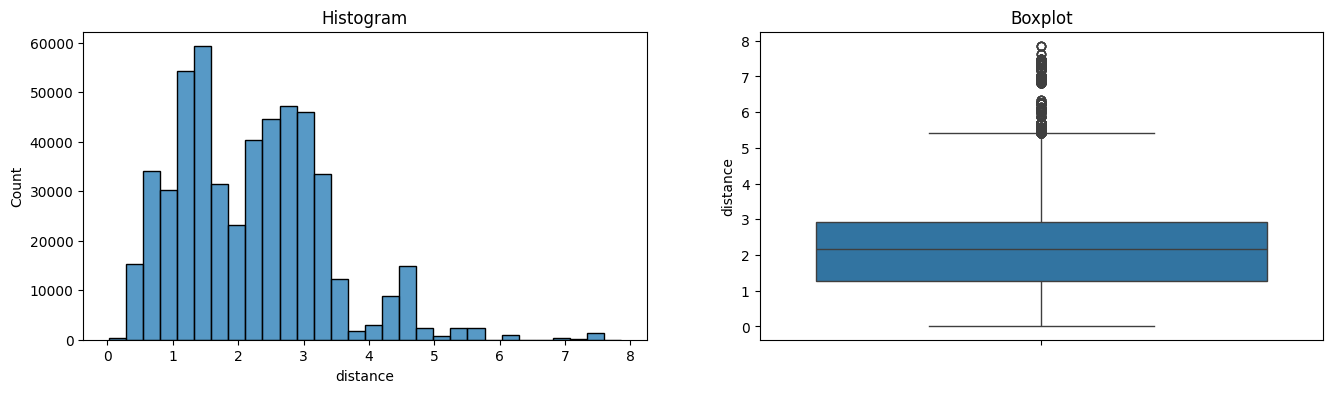


distance - After Capping


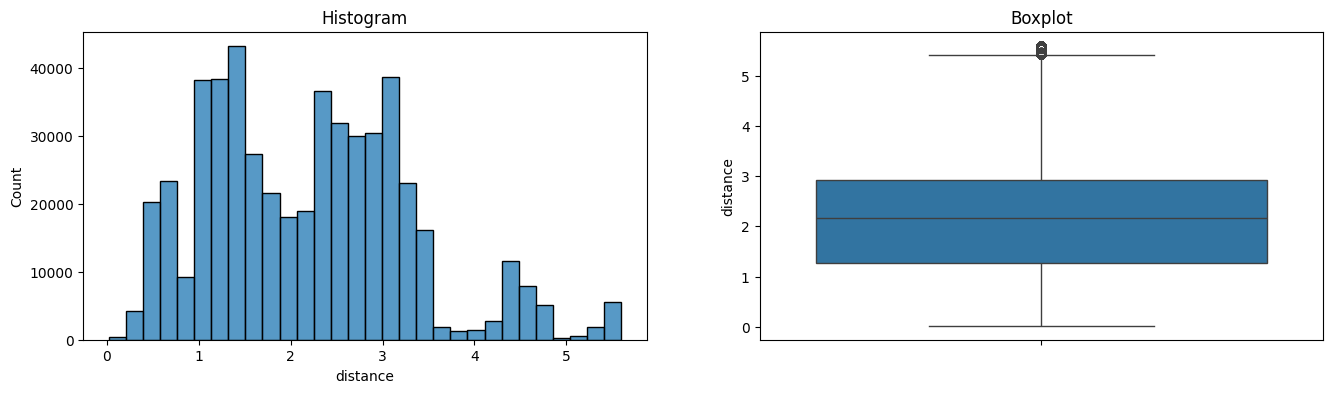

surge_multiplier - Before Capping


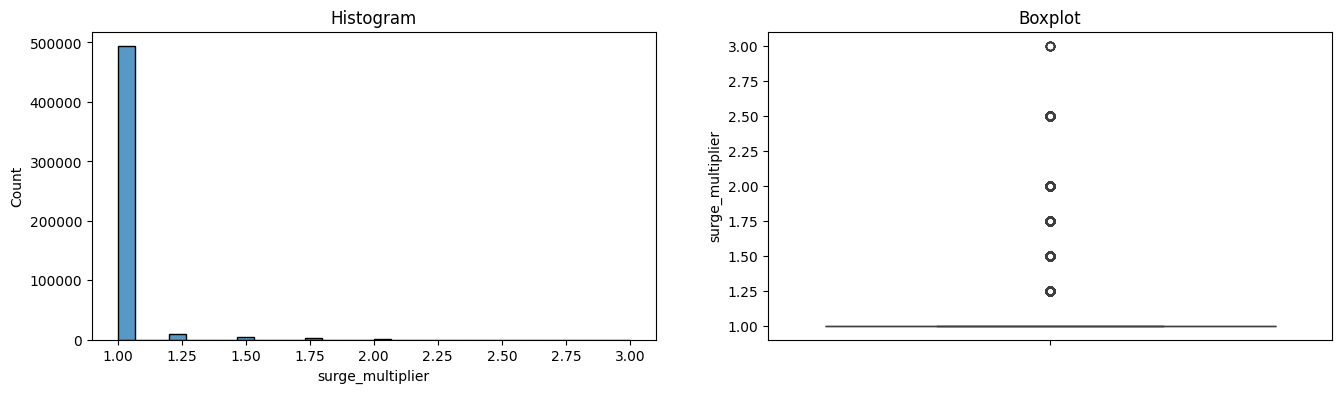


surge_multiplier - After Capping


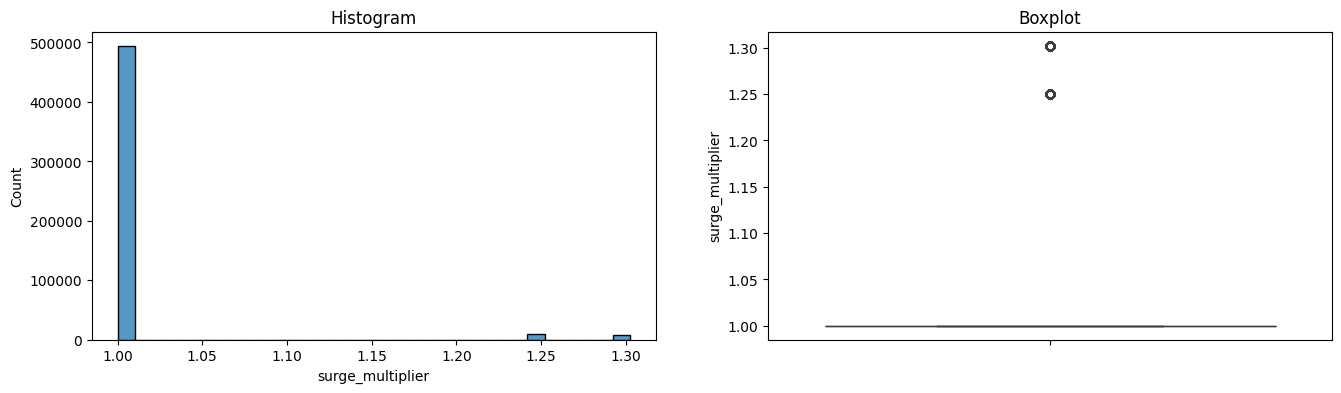

temperature - Before Capping


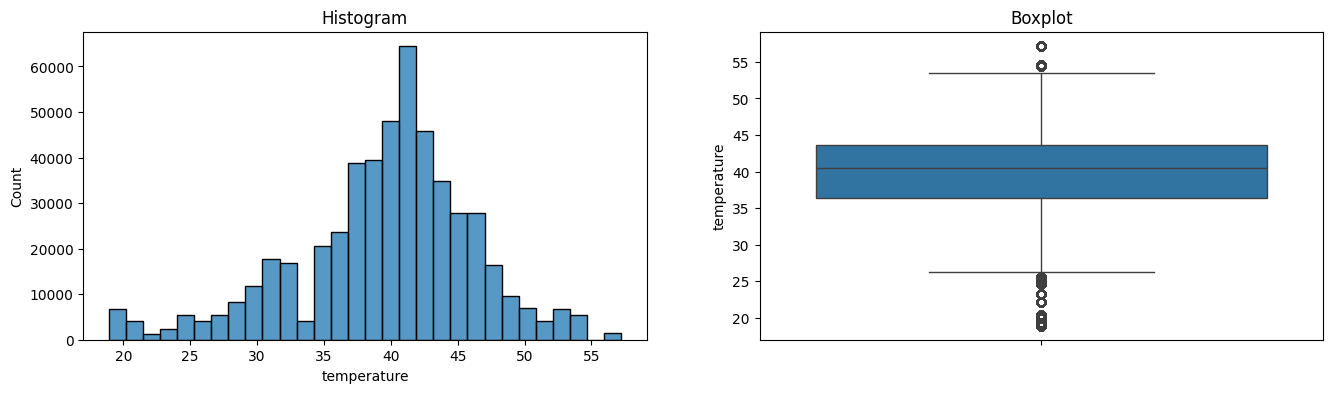


temperature - After Capping


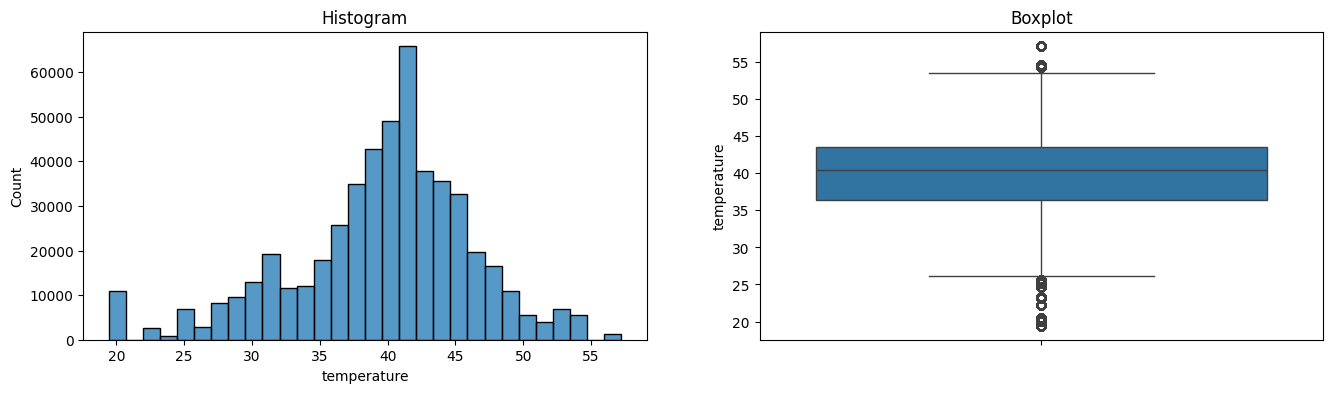

windSpeed - Before Capping


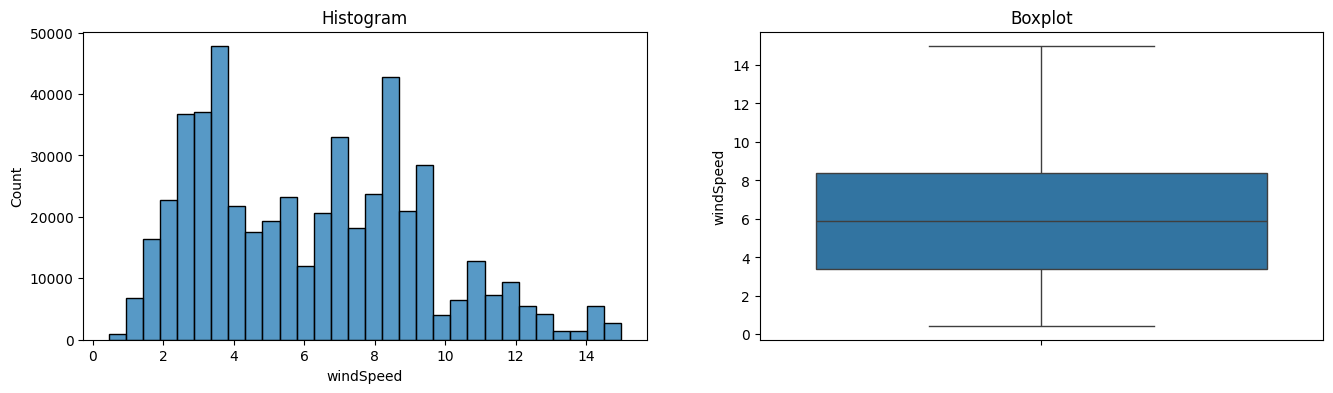


windSpeed - After Capping


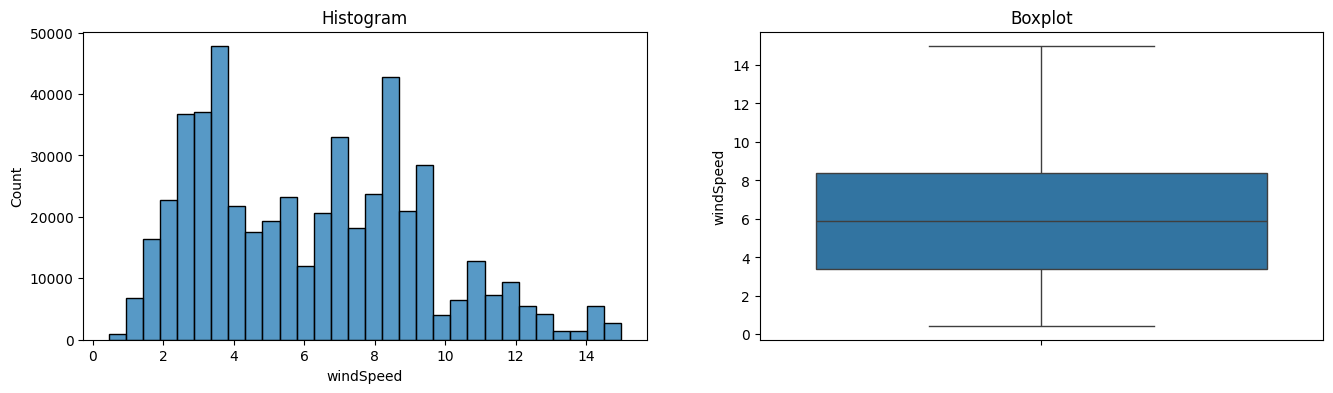

In [27]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

##### Handling Missing value pada data train dan test

In [28]:
# cek missing value pada data X_train
X_train_capped.isnull().sum()

distance            0
surge_multiplier    0
temperature         0
windSpeed           0
source              0
destination         0
cab_type            0
product_id          0
short_summary       0
long_summary        0
icon                0
dtype: int64

In [29]:
# cek missing value pada data X_test
X_test_capped.isnull().sum()

distance            0
surge_multiplier    0
temperature         0
windSpeed           0
source              0
destination         0
cab_type            0
product_id          0
short_summary       0
long_summary        0
icon                0
dtype: int64

In [30]:
# cek missing value pada y_train
y_train.isnull().sum()

0

In [31]:
# cek missing value pada y_test
y_test.isnull().sum()


0

**Kesimpulan,** baik pada X_train dan X_ test, kemudian pada y_train dan y_test sudah tidak ada adanya missing value, sehingga proses feature engineering bisa dilanjutkan ke tahapan encoding dan scaling.



In [32]:
# Split Between Numeric Columns and Categorical Columns

#get numeric and categorical column
num_columns = X_train_capped.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train_capped.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['distance', 'surge_multiplier', 'temperature', 'windSpeed']
Categorical Columns:  ['source', 'destination', 'cab_type', 'product_id', 'short_summary', 'long_summary', 'icon']


In [33]:
# Split numerical columns and categorical columns
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

X_train_num

,distance,surge_multiplier,temperature,windSpeed
449157,2.28,1.30238,32.050000,4.10
518584,1.08,1.00000,43.910000,11.24
627160,3.06,1.00000,27.830000,2.90
678838,3.07,1.00000,40.680000,5.22
377314,4.75,1.00000,49.880000,3.38
...,...,...,...,...
150885,1.91,1.00000,19.434781,3.60
217433,3.04,1.00000,42.810000,7.54
148855,1.77,1.00000,46.590000,3.33
124218,2.79,1.00000,41.240000,8.39


##### Feature Selection

Feature Selection Menggunakan Korelasi Pearson.

menghitung korelasi Pearson antara fitur numerik dan target (price).

In [34]:
X_train.head(3)

,distance,surge_multiplier,temperature,windSpeed,source,destination,cab_type,product_id,short_summary,long_summary,icon
449157,2.28,1.75,32.05,4.10,Back Bay,Haymarket Square,Lyft,lyft_plus,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
518584,1.08,1.00,43.91,11.24,North Station,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,Partly Cloudy,Partly cloudy throughout the day.,partly-cloudy-day
627160,3.06,1.00,27.83,2.90,West End,Northeastern University,Lyft,lyft_plus,Partly Cloudy,Partly cloudy throughout the day.,partly-cloudy-night


In [35]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_num.columns.tolist()
cat_columns = X_train_cat.columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['distance', 'surge_multiplier', 'temperature', 'windSpeed']
Cat Columns :  ['source', 'destination', 'cab_type', 'product_id', 'short_summary', 'long_summary', 'icon']


In [36]:
# Import libraty
from scipy.stats import kendalltau, pearsonr

In [37]:
# Feature selection Numerical columns menggunakan Pearson
p_values = []
interpretasi = []
cols = []

for col in num_cols:
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)
    
    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
        interpretasi.append('Ada Korelasi')
    else:
        interpretasi.append('Tidak Ada Korelasi')

# Hasil dalam DataFrame
data_results_num = pd.DataFrame({'nama kolom': cols, 
                               'hasil': interpretasi})

data_results_num

,nama kolom,hasil
0,distance,Ada Korelasi
1,surge_multiplier,Ada Korelasi
2,temperature,Tidak Ada Korelasi
3,windSpeed,Tidak Ada Korelasi


In [38]:
# Pilih fitur numerik yang memiliki korelasi signifikan
significant_num_features = data_results_num[data_results_num['hasil'] == 'Ada Korelasi']['nama kolom'].tolist()
significant_num_features

['distance', 'surge_multiplier']

In [39]:
# Feature selection Kategori columns 
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('Ada Korelasi')
  else :
    interpretasi.append('Tidak Ada Korelasi')

# Hasil dalam DataFrame
data_results_cat = pd.DataFrame({'nama kolom': cols, 
                                 'hasil': interpretasi})
data_results_cat

,nama kolom,hasil
0,source,Ada Korelasi
1,destination,Ada Korelasi
2,cab_type,Ada Korelasi
3,product_id,Ada Korelasi
4,short_summary,Tidak Ada Korelasi
5,long_summary,Tidak Ada Korelasi
6,icon,Tidak Ada Korelasi


In [40]:
# Pilih fitur kategori yang memiliki korelasi signifikan
significant_cat_features = data_results_cat[data_results_cat['hasil'] == 'Ada Korelasi']['nama kolom'].tolist()
significant_cat_features

['source', 'destination', 'cab_type', 'product_id']

#### Feature Encoding

Feature Encoding pada dataset ini menggunkan teknik One-Hot Encoder, karena One-hot encoder mengubah data kategorikal menjadi bentuk numerik tanpa memperkenalkan urutan antar kategori (menghindari ordinality).

Selain itu juga dapat menghindari bias yang bisa saja terjadi kalo menggunakan label encoding untuk data non-ordinal. 

Dataset pada kasus ini, kategori yang kita  miliki tidak punya urutan alami. Kategori seperti 'source', 'destination', 'cab_type', dan 'product_id' tidak memiliki urutan yang berarti. Jadi ga tepat kalo menggunakan Ordinal Encoder karena akan bias ke dalam data. 

Hasil yang di dapatkan menunjukkan bagaimana One-Hot Encoding mengubah kolom kategorikal menjadi kolom biner, di mana setiap kolom baru mewakili satu kategori unik dari kolom asli. Misalnya, kolom source_Beacon Hill akan memiliki nilai 1 jika source pada baris tersebut adalah "Beacon Hill", dan 0 jika bukan.


In [41]:
# cek data kolom kategori yang ada korelasi/signifikan
X_train_cat_significant = X_train_cat[significant_cat_features]

X_train_cat_significant.head(3)

,source,destination,cab_type,product_id
449157,Back Bay,Haymarket Square,Lyft,lyft_plus
518584,North Station,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2
627160,West End,Northeastern University,Lyft,lyft_plus


In [42]:
# import library
from sklearn.compose import ColumnTransformer

# One-hot encoding menggunakan ColumnTransformer
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Terapkan encoding pada kolom kategori yang signifikan
ct = ColumnTransformer(
    transformers=[
        ('cat', encoder, significant_cat_features)]) 

In [43]:
encoder.fit(X_train_cat_significant)

OneHotEncoder(drop='first', sparse_output=False)

In [44]:
X_train_cat_encoded = ct.fit_transform(X_train_capped)
X_test_cat_encoded = ct.transform(X_test_capped)

X_train_cat_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
# Nama kolom baru setelah one-hot encoding
cat_col_names = ct.named_transformers_['cat'].get_feature_names_out(significant_cat_features)
print('Categorical Columns After Encoding:', cat_col_names)

Categorical Columns After Encoding: ['source_Beacon Hill' 'source_Boston University' 'source_Fenway'
 'source_Financial District' 'source_Haymarket Square' 'source_North End'
 'source_North Station' 'source_Northeastern University'
 'source_South Station' 'source_Theatre District' 'source_West End'
 'destination_Beacon Hill' 'destination_Boston University'
 'destination_Fenway' 'destination_Financial District'
 'destination_Haymarket Square' 'destination_North End'
 'destination_North Station' 'destination_Northeastern University'
 'destination_South Station' 'destination_Theatre District'
 'destination_West End' 'cab_type_Uber'
 'product_id_6c84fd89-3f11-4782-9b50-97c468b19529'
 'product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546'
 'product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 'product_id_997acbb5-e102-41e1-b155-9df7de0a73f2'
 'product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d' 'product_id_lyft'
 'product_id_lyft_line' 'product_id_lyft_lux' 'product_id_lyft_luxsuv'
 'product_id_lyft_p

#### Feature Scaling


In [46]:
# cek data kolom numerik yang ada korelasi/signifikan
X_train_num_significant = X_train_num[significant_num_features]
X_test_num_significant = X_test_num[significant_num_features]

X_train_num_significant

,distance,surge_multiplier
449157,2.28,1.30238
518584,1.08,1.00000
627160,3.06,1.00000
678838,3.07,1.00000
377314,4.75,1.00000
...,...,...
150885,1.91,1.00000
217433,3.04,1.00000
148855,1.77,1.00000
124218,2.79,1.00000


**Feature scaling** yang digunakan dalam kasus ini yaitu `StandardScaler` karena data memiliki distribusi normal (Gaussian). Hal tersebut akan membantu model untuk memahami distribusi data dengan lebih baik dan melakukan prediksi yang lebih akurat. 

Dengan `StandardScaler`, semua fitur memiliki skala yang sama sehingga model tidak bias terhadap fitur tertentu.

In [47]:
#Feature Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num_significant)

X_train_num_scaled = scaler.transform(X_train_num_significant)
X_test_num_scaled = scaler.transform(X_test_num_significant)

X_train_num_scaled

array([[ 0.08857196,  5.94397438],
       [-0.99348685, -0.18406197],
       [ 0.79191019, -0.18406197],
       ...,
       [-0.37130303, -0.18406197],
       [ 0.54844696, -0.18406197],
       [ 0.8099445 , -0.18406197]])

#### Concate between Numeric Columns and Categorical Columns

In [48]:
# Concate Columns 
# Gabungkan kolom numerik yang telah di-scaling dan kolom kategorikal yang telah di-encode

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)

print(X_train_final.shape)
print(X_test_final.shape)

(510380, 36)
(127596, 36)


In [49]:
final_col_names = np.concatenate([significant_num_features, cat_col_names])

# Buat DataFrame dari hasil encoding dan scaling
X_train_final_df = pd.DataFrame(X_train_final, columns=final_col_names)
X_test_final_df = pd.DataFrame(X_test_final, columns=final_col_names)

X_train_final_df.head(3)

,distance,surge_multiplier,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,...,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier
0,0.088572,5.943974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.993487,-0.184062,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.791910,-0.184062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 6. Model Definition

In [50]:
#Training using Linear Regression

model = LinearRegression()

Pada kasus dataset ini, untuk mendefinisikan model yang akan digunakan untuk memprediksi harga perjalanan (price) menggunakan `LinearRegression` karena ini adalah model dasar yang sering digunakan untuk regresi. Alasannya karena model ini lebih sederhana dan efisien.

Linear Regression memiliki sedikit hyperparameter, jadi mudah untuk diatur. Salah satu parameter penting adalah regularisasi, namun dalam model dasar ini, akan menggunakan Linear Regression tanpa regularisasi.

Tapi, aku akan coba perluas ke variasi dari linear regression dengan Ridge Regression (L2) dan akan membandingkannya dengan Lasso Regression dan ElasticNet Regression. 
- Hyperparameter: alpha yang mengontrol kekuatan regularisasi. Semakin besar alpha, semakin kuat regularisasi yang diterapkan untuk mencegah overfitting.

### 7. Model Training

##### Preprocessing

In [52]:
from sklearn.pipeline import Pipeline

# Define categorical columns (asumsi 'source', 'destination', and 'product_id' masih data kategori)
categorical_features = ['source', 'destination', 'cab_type', 'product_id']
numeric_features = ['distance', 'surge_multiplier']

#Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Create a pipeline that preprocesses data then fits the model
def create_pipeline(model):
    return Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

##### Ridge Regression
Ridge Regression dengan hyperparameter tuning menggunakan GridSearchCV:

In [82]:
### Ridge Regression with Hyperparameter Tuning

# Import libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression model
ridge_model = Ridge()

# Define the hyperparameter grid
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Perform Grid Search with Cross-Validation
ridge_grid_search = GridSearchCV(estimator=ridge_model, 
                                 param_grid=param_grid_ridge, 
                                 cv=5, 
                                 scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train_final_df, y_train)

# Get the best model and its parameters
best_ridge_model = ridge_grid_search.best_estimator_
best_ridge_params = ridge_grid_search.best_params_


# TRAINING MODEL
# Train the best Ridge model on the training set
best_ridge_model.fit(X_train_final_df, y_train)


# MODEL EVALUATION
# Make predictions on the test set
ridge_predictions = best_ridge_model.predict(X_test_final_df)

# Evaluate Ridge Regression model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Print the evaluation metrics
print(f'Best Hyperparameters: {best_ridge_params}')
print(f'Mean Squared Error (MSE): {ridge_mse}')
print(f'Mean Absolute Error (MAE): {ridge_mae}')
print(f'Root Mean Square Error (RMSE): {ridge_rmse}\n')
print(f'R-squared (R²): {ridge_r2}')

# Displaying the coefficients
coefficients = pd.DataFrame({'Feature': X_train_final_df.columns, 'Coefficient': best_ridge_model.coef_})
print(coefficients)

Best Hyperparameters: {'alpha': 0.1}
Mean Squared Error (MSE): 6.628709842101339
Mean Absolute Error (MAE): 1.7823795984218989
Root Mean Square Error (RMSE): 2.5746280978233225

R-squared (R²): 0.9230397934826866
                                            Feature  Coefficient
0                                          distance     3.339808
1                                  surge_multiplier     1.597938
2                                source_Beacon Hill    -0.455472
3                          source_Boston University    -0.454124
4                                     source_Fenway    -0.230882
5                         source_Financial District     0.279303
6                           source_Haymarket Square     0.423718
7                                  source_North End     0.540274
8                              source_North Station    -0.088897
9                    source_Northeastern University    -0.434292
10                             source_South Station     0.136917
11     

c:\Users\hp\.conda\envs\iznia\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Dengan langkah-langkah di atas, kita dapat melakukan hyperparameter tuning pada model Ridge Regression untuk mendapatkan performa yang optimal.

Statement:
- Model Ridge Regression dengan alpha = 0.1 memberikan performa yang sangat baik dalam memprediksi harga berdasarkan fitur-fitur yang tersedia.

- analisis metrik:
    1. MSE = 6.6287. Nilainya relatif rendah yang artinya rata-rata kuadrat dari kesalahan predikti cukup  kecil.
    2. MAE = 1.7824. Nilainya juga cukup rendah artinya rata-rata kesalahan absolut dari prediksi juga kecil.
    3. RMSE = 2.5746. 
    4. R-squared = 0.9230. Menunjukkan bahwa model dapat menjelaskan 92.3% dari variabilitas data target, yang merupakan indikasi performa yang sangat baik.

- Model ini berhasil menjelaskan sebagian besar variabilitas dalam data target, artinya model ini dapat diandalkan untuk prediksi harga.

##### Train Lasso Regression Model

In [57]:
from sklearn.linear_model import Lasso, ElasticNet

# Define the model
lasso = Lasso()

# Define the hyperparameter grid
param_grid = {'model__alpha': [0.01, 0.1, 1, 10, 100]}

# Create pipeline
lasso_pipeline = create_pipeline(lasso)

# Use GridSearchCV for hyperparameter tuning
lasso_cv = GridSearchCV(lasso_pipeline, param_grid, cv=5)

# TRAINING MODEL
lasso_cv.fit(X_train, y_train)


# MODEL EVALUATION
# Predict on the test set
lasso_predictions = lasso_cv.predict(X_test)

# Calculate metrics
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Lasso Regression")
print("Best Hyperparameters:", lasso_cv.best_params_)
print("Mean Squared Error (MSE):", lasso_mse)
print("Mean Absolute Error (MAE):", lasso_mae)
print("Root Mean Square Error (RMSE):", lasso_rmse)
print("R-squared (R²):", lasso_r2)


Lasso Regression
Best Hyperparameters: {'model__alpha': 0.01}
Mean Squared Error (MSE): 6.19352734664735
Mean Absolute Error (MAE): 1.7409217590079467
Root Mean Square Error (RMSE): 2.4886798401255534
R-squared (R²): 0.9280923203726313


##### Train ElasticNet Model

In [58]:
# Define the model
elastic_net = ElasticNet()

# Define the hyperparameter grid
param_grid = {'model__alpha': [0.01, 0.1, 1, 10, 100],
              'model__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]}

# Create pipeline
elastic_net_pipeline = create_pipeline(elastic_net)

# Use GridSearchCV for hyperparameter tuning
elastic_net_cv = GridSearchCV(elastic_net_pipeline, param_grid, cv=5)


# TRAINING MODEL
elastic_net_cv.fit(X_train, y_train)


# MODEL EVALUATION
# Predict on the test set
elastic_net_predictions = elastic_net_cv.predict(X_test)

# Calculate metrics
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)
elastic_net_mae = mean_absolute_error(y_test, elastic_net_predictions)
elastic_net_rmse = np.sqrt(elastic_net_mse)
elastic_net_r2 = r2_score(y_test, elastic_net_predictions)

print("Elastic Net")
print("Best Hyperparameters:", elastic_net_cv.best_params_)
print("Mean Squared Error (MSE):", elastic_net_mse)
print("Mean Absolute Error (MAE):", elastic_net_mae)
print("Root Mean Square Error (RMSE):", elastic_net_rmse)
print("R-squared (R²):", elastic_net_r2)


Elastic Net
Best Hyperparameters: {'model__alpha': 0.01, 'model__l1_ratio': 1}
Mean Squared Error (MSE): 6.19352734664735
Mean Absolute Error (MAE): 1.7409217590079467
Root Mean Square Error (RMSE): 2.4886798401255534
R-squared (R²): 0.9280923203726313


##### Comparison
Setelah melatih model-model tersebut dan menghitung metrik evaluasi, selanjutnya bandingkan hasilnya dengan hasil (Lasso, Ridge, dan ElasticNet):

In [63]:
# Summary of results
results = pd.DataFrame({
    "Model": ["Ridge Regression", "Lasso Regression", "Elastic Net"],
    "Best Hyperparameters": [ridge_grid_search.best_params_, lasso_cv.best_params_, elastic_net_cv.best_params_],
    "MSE": [ridge_mse, lasso_mse, elastic_net_mse],
    "MAE": [ridge_mae, lasso_mae, elastic_net_mae],
    "RMSE": [ridge_rmse, lasso_rmse, elastic_net_rmse],
    "R2-Squared": [ridge_r2, lasso_r2, elastic_net_r2]
})

results


,Model,Best Hyperparameters,MSE,MAE,RMSE,R2-Squared
0,Ridge Regression,{'alpha': 0.1},6.628710,1.782380,2.574628,0.923040
1,Lasso Regression,{'model__alpha': 0.01},6.193527,1.740922,2.488680,0.928092
2,Elastic Net,"{'model__alpha': 0.01, 'model__l1_ratio': 1}",6.193527,1.740922,2.488680,0.928092


Penjelasan:

- Lasso Regression dan ElasticNet menunjukkan performa yang sangat mirip dengan MSE, MAE, dan RMSE yang sama, serta nilai R2 yang identik (0.928092). Ini menunjukkan bahwa kedua model ini mampu menangkap variasi dalam data dengan baik.
- Untuk Ridge Regression, hyperparameter terbaik yaitu `alpha = 0.1`. Ini menunjukkan bahwa dengan sedikit regulasi, model ini sudah bisa memberikan performa yang baik.
- Untuk ElasticNet, hyperparameter terbaik adalah alpha = 0.01 dan l1_ratio = 1. Nilai l1_ratio sebesar 1 menunjukkan condong ke Lasso Regression. Ini menjelaskan kenapa performanya identik dengan Lasso Regression.

- Berdasarkan hasil evaluasi di atas, Lasso Regression atau ElasticNet dengan l1_ratio = 1 (yang bertindak kayak Lasso) adalah pilihan yang lebih baik dibandingkan Ridge Regression untuk dataset ini.

**Jika tadi awalnya tidak dilakukan regularisasi dengan Lasso, Ridge, dan ElasticNet Regression.  Ini step lanjutannya:** 

**Jika tidak menyesuaikan hyperparameter tadi, maka akan langsung dilatih modelnya.**

In [64]:
#Train the model

model.fit(X_train_final_df, y_train)

LinearRegression()

In [65]:
# Prediksi pada data training dan test
y_pred_train = model.predict(X_train_final_df)
y_pred_test = model.predict(X_test_final_df)

Setelah model dilatih, kita menggunakan model tersebut untuk membuat prediksi pada data uji `(X_test_final_df)`.

### 8. Model Evaluation

In [66]:
# Evaluasi model menggunakan Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared (R²)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)


# Tampilkan hasil evaluasi
print(f'MAE - Train Set  : {mae_train}')
print(f'MAE - Test Set   : {mae_test}\n')

print(f'MSE - Train Set  : {mse_train}')
print(f'MSE - Test Set   : {mse_test}\n')

print(f'RMSE - Train Set : {rmse_train}')
print(f'RMSE - Test Set  : {rmse_test}\n')

print(f'R2 Score - Train Set : {r2_train}')
print(f'R2 Score - Test Set  : {r2_test}\n')

MAE - Train Set  : 1.78552810974731
MAE - Test Set   : 1.7826569266504486

MSE - Train Set  : 6.73621142350911
MSE - Test Set   : 6.628712598610116

RMSE - Train Set : 2.5954212420162377
RMSE - Test Set  : 2.574628633145005

R2 Score - Train Set : 0.9227010322944287
R2 Score - Test Set  : 0.9230397614792515



c:\Users\hp\.conda\envs\iznia\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\hp\.conda\envs\iznia\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Berdasarkan analisis model evaluasi ini, sebenernya tidak ada satu metrik yang selalu paling bagus untuk semua situasi. Tapi aku mempertimbangakn RMSE karena sesuai dengan definisinya dia lebih sensitif terhadap outlier. Jadi RMSE ini metrik evaluasi yang paling sesuai karna memberikan kombinasi terbaik dari penalti untuk kesalahan besar dan kemudahan interpretasi. RMSE memberikan penalti yang lebih besar untuk kesalahan yang lebih besar (seperti MSE), tetapi tetap berada dalam skala yang sama dengan data aslinya (seperti MAE), ini membuat RMSE lebih informatif.
Statement Kesimpulan:

Analisis berdasarkan hasil Evaluasi:
- Berdasarkan hasil R2, nilai R2 yang tinggi (0.92) untuk train set dan test set. Nilai yang lebih tinggi menunjukkan model yang lebih baik. Dilihat dari nilai MAE, MSE, dan RMSE yang cukup konsisten antara train set dan test set, maka model ini termasuk **good fit**. Model ini dapat menjelaskan sebagian besar variansi dalam data dan memiliki kesalahan prediksi yang rendah dan konsisten.

Bisnis Implikasi: 
- Jika sebuah perjalanan memiliki jarak tertentu, faktor-faktor seperti jarak, jenis kendaraan, tujuan akan mempengaruhi harga perjalanan. Misalnya, perjalanan dari Financial District ke Fenway dengan UberX selama musim hujan diprediksi lebih mahal karena faktor-faktor tersebut.
- Dengan melakukan langkah-langkah di atas, kita dapat mengevaluasi model Linear Regression secara menyeluruh dan memahami bagaimana model ini bekerja dalam konteks bisnis.
- Eksplorasi data aktual dengan data hasil prediksi menunjukkan bahwa model dapat memprediksi harga perjalanan dengan baik. 

##### Visualisasi Nilai Prediksi vs Nilai Aktual

Untuk melengkapi analisis, perlu membandingkan prediksi dengan nilai aktual pada data training dan test.

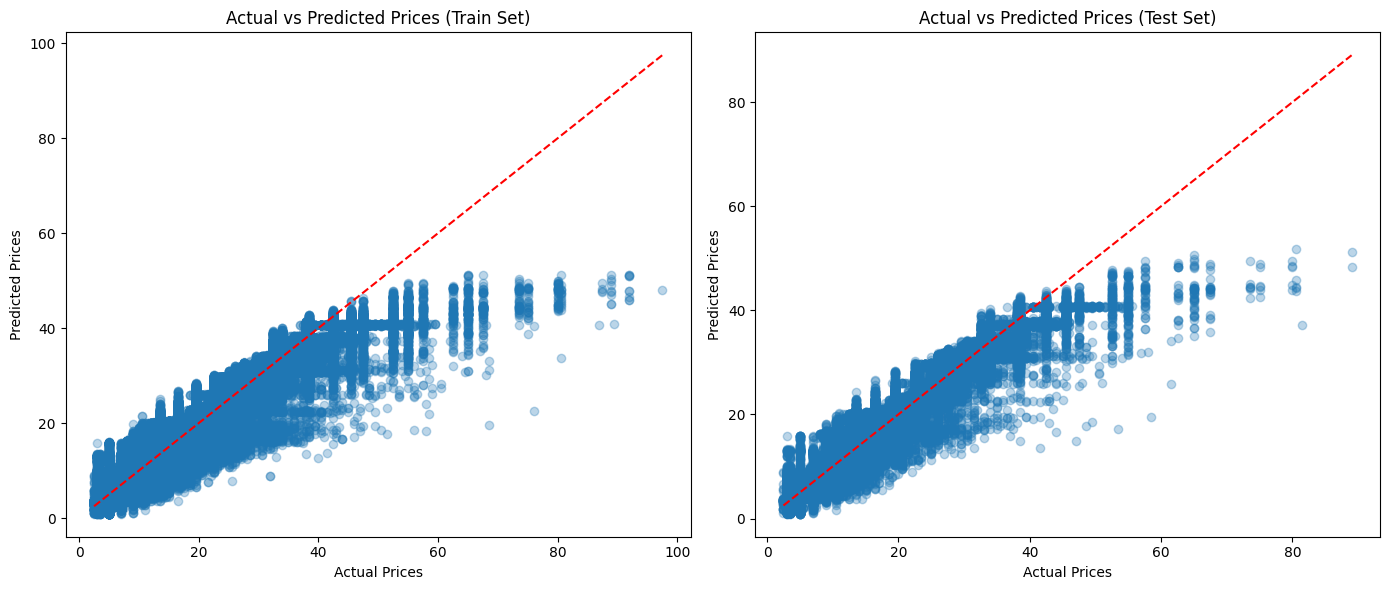

In [67]:
# Visualisasi Prediksi vs Nilai Aktual untuk Train Set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Train Set)')

# Visualisasi Prediksi vs Nilai Aktual untuk Test Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Test Set)')

plt.tight_layout()
plt.show()


**Penjelasan:**
1. Train Set
    - Hasilnya menunjukkan bahwa garis merah putus-putus (y = x) adalah referensi yang menunjukkan di mana nilai prediksi sama dengan nilai aktual.
    - Sebagian besar titik berada di sekitar garis ini, menunjukkan bahwa model memprediksi harga dengan baik pada data training.
    - Beberapa titik yang lebih jauh dari garis ini menunjukkan kesalahan prediksi, tetapi mayoritas titik tetap berada di dekat garis.

2. Test Set
    - Garis merah putus-putus (y = x) sekali lagi adalah referensi untuk nilai prediksi yang sempurna.
    - Sebagian besar titik juga berada di sekitar garis ini, menunjukkan bahwa model juga memprediksi harga dengan baik.
    - Sama seperti plot kiri, beberapa titik berada jauh dari garis, menunjukkan kesalahan prediksi, tetapi secara keseluruhan prediksi tetap dekat dengan nilai aktual.


## **Memeriksa Asumsi**

**1. Assumption 1 : Linear Relationship**

Asumsi bahwa hubungan antara variabel independen (fitur) dengan variabel dependen (target) adalah linear.

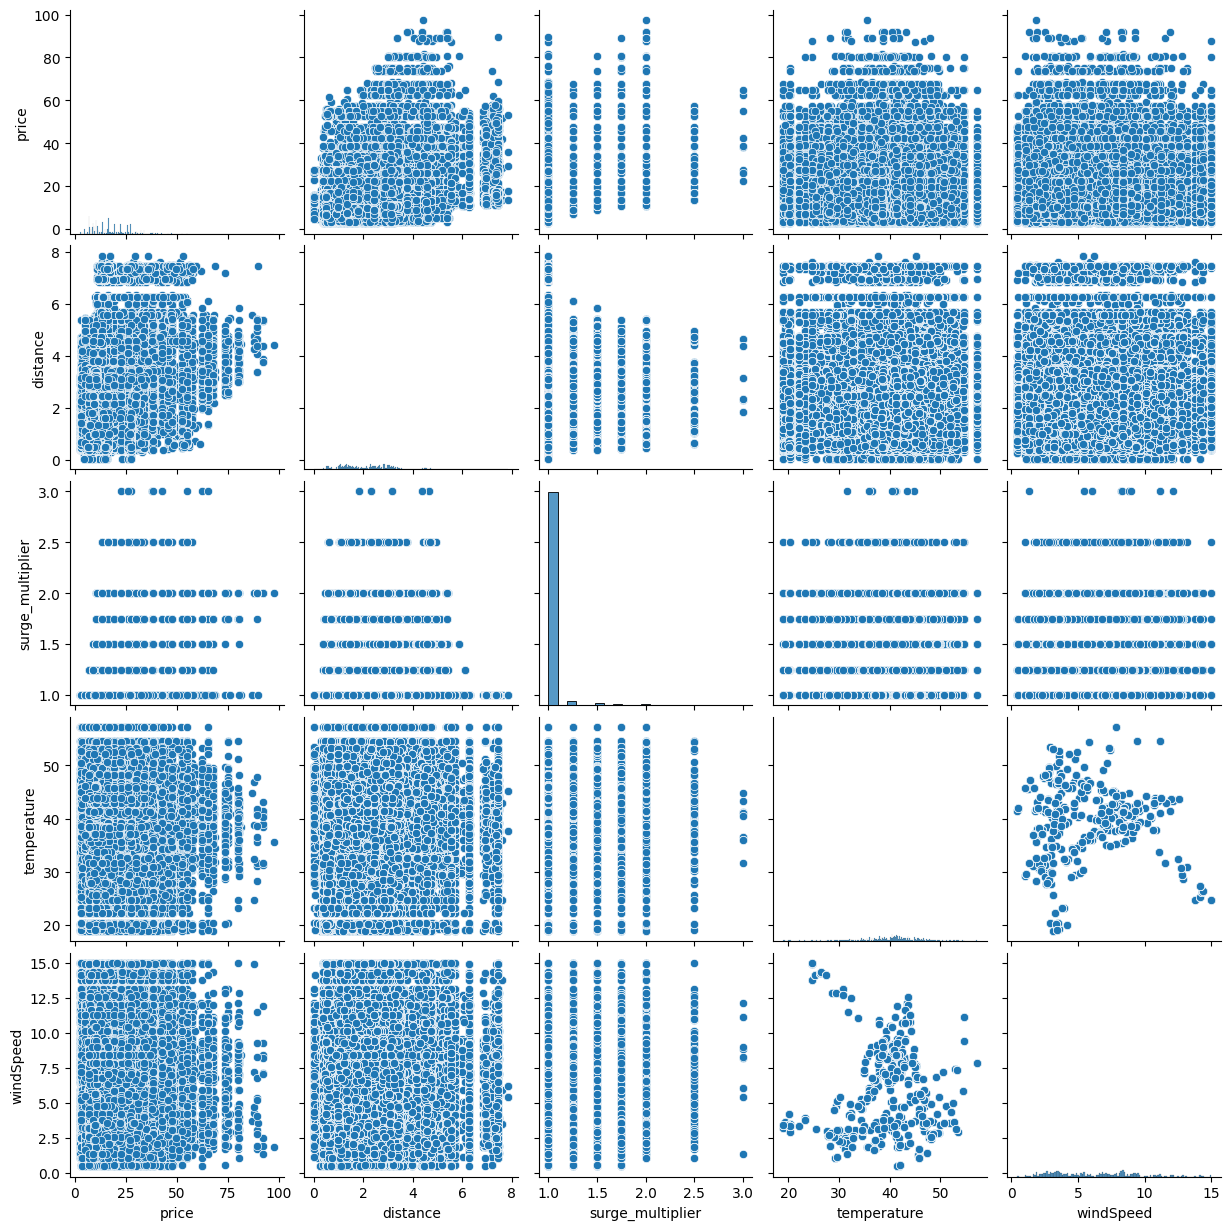

In [69]:
# Check the relationship between independent variables and dependent variable

sns.pairplot(data[['price', 'distance', 'surge_multiplier', 'temperature', 'windSpeed']])
plt.show()

**2. No or Little Multicollinearity:**

Multicollinearity dapat menyebabkan koefisien regresi menjadi tidak stabil atau sulit diinterpretasikan. Makanya perlu diperiksa korelasi antar variabel sebelum membangun model.

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Pastikan semua kolom berupa numerik (handle variabel kategorikal jika perlu)
    kolom_numerik = X.select_dtypes(include=['number']).columns.tolist()
    X_numerik = X[kolom_numerik]

    # Hitung VIF untuk setiap variabel
    hasil_vif = pd.DataFrame()
    hasil_vif["Variabel"] = X_numerik.columns
    hasil_vif["VIF"] = [variance_inflation_factor(X_numerik.values, i) for i in range(X_numerik.shape[1])]

    return hasil_vif

# Contoh penggunaan
hasil_vif = calc_vif(X_train)

hasil_vif



,Variabel,VIF
0,distance,4.630595
1,surge_multiplier,31.132217
2,temperature,27.981066
3,windSpeed,4.803983


Statement:

- Variabel `surge_multiplier` dan `temperature` memiliki VIF yang sangat tinggi, melebihi nilai 10, hal ini dianggap sebagai multikolinearitas yang signifikan.
- Variabel `distance` dan `windSpeed`, meskipun memiliki VIF yang lebih rendah, tetap perlu diperhatikan agar tidak mengganggu interpretasi koefisien regresi.

Langkah selanjutnya jika ditemukan multikolinearitas yang signifikan yaitu melakukan analisis lebih lanjut, seperti regresi ridge atau regresi lasso yang bisa mengatasi masalah multikolinearitas.

Nah tapi aku ngerjainnya kebalik hehe, jadi aku ngerjain model definition - model training - model evaluation terlebih dahulu. Seharusnya dilakukan uji Multicollinearity terlebih dahulu. 

**3. Multivariate Normality:**

**4. No Auto-Correlation:**

**5. Homoscedasticity:**

### 9. Model Saving



In [68]:
#Save the Files

import pickle
import json

# Definisikan kolom numerik dan kategorikal yang signifikan
significant_num_features = ['distance', 'surge_multiplier']     # Kolom numerik yg signifikan
significant_cat_features = ['source', 'destination', 'cab_type', 'product_id']  # Kolom kategorikal yg signifikan

# Simpan daftar kolom numerik dan kategorikal ke dalam file
with open('1. list_num_cols.txt', 'w') as file_1:
    json.dump(significant_num_features, file_1)

with open('2. list_cat_cols.txt', 'w') as file_2:
    json.dump(significant_cat_features, file_2)

# Simpan scaler
with open('3. scaler.pkl', 'wb') as file_3:
    pickle.dump(scaler, file_3)

# Simpan encoder
with open('4. encoder.pkl', 'wb') as file_4:
    pickle.dump(encoder, file_4)

# Simpan model regresi linear
with open('5. model_lin_reg.pkl', 'wb') as file_5:
    pickle.dump(model, file_5)

### 10. Model Inference



Ada versi file `.ipynb` tersendiri juga

In [84]:
# Import Libraries

import pickle
import json
import pandas as pd
import numpy as np

##### Load Files

In [85]:
# Load Files

with open('1. list_num_cols.txt', 'r') as file_1:
    list_cat_cols = json.load(file_1)

with open('2. list_cat_cols.txt', 'r') as file_2:
    list_num_cols = json.load(file_2)

with open('3. scaler.pkl', 'rb') as file_3:
    encoder = pickle.load(file_3)

with open('4. encoder.pkl', 'rb') as file_4:
    scaler = pickle.load(file_4)

with open('5. model_lin_reg.pkl', 'rb') as file_5:
    model_lin_reg = pickle.load(file_5)

##### Inferencing

In [86]:
# Create new data
data_inf = {
    'distance': 5.5,
    'surge_multiplier': 1.5,
    'source': 'Financial District',
    'destination': 'Fenway',
    'cab_type': 'Uber',
    'product_id': 'lyft_luxsuv'	
}

data_inf = pd.DataFrame([data_inf])
data_inf


,distance,surge_multiplier,source,destination,cab_type,product_id
0,5.5,1.5,Financial District,Fenway,Uber,lyft_luxsuv


In [87]:
# Split between categorical and numerical
data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]

# Display data
data_inf_num

,source,destination,cab_type,product_id
0,Financial District,Fenway,Uber,lyft_luxsuv


In [88]:
# Feature Scaling and Encoding
data_inf_scaled = scaler.transform(data_inf_num)
data_inf_encoded = encoder.transform(data_inf_cat)
data_inf_final = np.concatenate([data_inf_scaled, data_inf_encoded], axis=1)

# Display data
data_inf_final

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 2.99209645,
        9.94895592]])

In [89]:
# Predict using linear regression
y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

c:\Users\hp\.conda\envs\iznia\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-2.06703291e+12])

### 11. Kesimpulan

Kesimpulan ini yang mencerminkan hasil yang didapat dari proses analisis dan pemodelan, serta memberikan rekomendasi untuk perbaikan lebih lanjut.

1. Narasi berdasarkan EDA 
    - Distribusi Fitur: Distribusi fitur numerik seperti `distance` dan `surge_multiplier` menunjukkan variasi yang signifikan dalam dataset. Beberapa fitur menunjukkan skewness yang perlu ditangani dengan teknik seperti Winsorization.
    - Kolom Kategorikal: Fitur kategorikal seperti `source`, `destination`, `cab_type`, `product_id`, `short_summary`, `long_summary`, `icon` memiliki sejumlah besar kategori yang perlu di-encode sebelum digunakan dalam model.
    - Korelasi: Korelasi antara fitur numerik dan target (y) menunjukkan bahwa beberapa fitur memiliki hubungan yang signifikan dengan harga perjalanan, seperti `distance` dan `surge_multiplier`.

2. Narasi berdasarkan Model Evaluation
    Evaluasi model dilakukan untuk menilai kinerja model regresi linier yang telah dibangun. Berikut adalah hasil evaluasi model:
    - Mean Absolute Error (MAE):
        - MAE - Train Set: 1.7855
        - MAE - Test Set: 1.7827
    - Mean Squared Error (MSE):
        - MSE - Train Set: 6.7362
        - MSE - Test Set: 6.6287
    - Root Mean Squared Error (RMSE):
        - RMSE - Train Set: 2.5954
        - RMSE - Test Set: 2.5746
    - R-squared (R2):
        - R2 - Train Set: 0.9227
        - R2 - Test Set: 0.9230

    Hasil evaluasi menunjukkan bahwa model memiliki performa yang baik dengan R2 yang tinggi dan kesalahan prediksi yang rendah dan konsisten antara train set dan test set. Model ini dapat dianggap sebagai **good fit**.

3. Narasi berdasarkan Model Analysis
    - Signifikansi Fitur: Fitur seperti `distance dan surge_multiplier` sangat signifikan dalam memprediksi harga perjalanan. Fitur-fitur kategorikal seperti `source, destination, cab_type, dan product_id` juga berkontribusi signifikan setelah di-encode.
    - Stabilitas Model: Model menunjukkan stabilitas yang baik dengan performa yang konsisten antara train set dan test set, hal ini menunjukkan bahwa model tidak overfitting atau underfitting.
    - Interpretasi Model: Koefisien dari model regresi memberikan wawasan tentang pengaruh masing-masing fitur terhadap harga perjalanan. Misalnya, peningkatan jarak (distance) akan meningkatkan harga perjalanan.

4. Further Improvement
   - Fitur Tambahan: Mempertimbangkan fitur tambahan yang dapat mempengaruhi harga perjalanan, seperti waktu dalam sehari, hari dalam minggu, cuaca, dan kondisi lalu lintas.
    - Model Lain: Menguji model lain seperti Random Forest Regression, Gradient Boosting, atau XGBoost untuk melihat apakah ada peningkatan kinerja dibandingkan dengan regresi linier.

**Kesimpulan Akhir**
Model regresi linier yang dibangun menunjukkan kinerja yang baik dalam memprediksi harga perjalanan pada dataset Uber dan Lyft. Dengan R2 yang tinggi dan kesalahan prediksi yang rendah, model ini dapat digunakan untuk memberikan estimasi harga yang akurat. Rekomendasi perbaikan dapat diterapkan untuk meningkatkan performa lebih lanjut. Implementasi model ke dalam sistem produksi dapat membantu perusahaan dalam menentukan harga perjalanan yang lebih dinamis dan akurat.
